In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1.1 Join DataFrame

In [16]:
data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [17]:
# Leyendo los tres diccionarios y convertirlos en DataFrames
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df3 = pd.DataFrame(data_3)

In [18]:
# Uniendo df1 y df2 a lo largo de las filas
pd.concat([df1, df2], axis=1)

id primer_nombre  apellido id primer_nombre  apellido
0  1          Alex  Anderson  4          Luis      Ruiz
1  2           Amy    Ruales  5         Brian   Giralgo
2  3     Valentina     Marin  6       Mariana   Ortegon
3  4         Alice   Barbosa  7       Marcela  Palacios
4  5          Lina    Robles  8        Carlos   Gallego

In [19]:
# Uniendo df1 y df2 a lo largo de las columnas
pd.concat([df1, df2], axis=0)

id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

In [20]:
pd.merge(df1, df2, how='left').merge(df3, on='id')

id primer_nombre  apellido  test_id
0  1          Alex  Anderson       51
1  2           Amy    Ruales       15
2  3     Valentina     Marin       15
3  4         Alice   Barbosa       61
4  5          Lina    Robles       16

In [21]:
df1

id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles

In [22]:
df2

id primer_nombre  apellido
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

In [23]:
pd.merge(df1, df2, on='id').merge(df3, on='id')

id primer_nombre_x apellido_x primer_nombre_y apellido_y  test_id
0  4           Alice    Barbosa            Luis       Ruiz       61
1  5            Lina     Robles           Brian    Giralgo       16

## 1.2 GroupBy

In [24]:
df_alcohol = pd.read_csv('../data/datos_alcohol.txt')

In [25]:
df_alcohol.head()

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0  Afghanistan                  0                0               0   
1      Albania                 89              132              54   
2      Algeria                 25                0              14   
3      Andorra                245              138             312   
4       Angola                217               57              45   

   litros_totales_de_alcohol_puro continente  
0                             0.0         AS  
1                             4.9         EU  
2                             0.7         AF  
3                            12.4         EU  
4                             5.9         AF

In [26]:
df_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pais                            193 non-null    object 
 1   porciones_cerveza               193 non-null    int64  
 2   porciones_licor                 193 non-null    int64  
 3   porciones_vino                  193 non-null    int64  
 4   litros_totales_de_alcohol_puro  193 non-null    float64
 5   continente                      170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [27]:
df_alcohol.continente.unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [28]:
df_alcohol.groupby(['continente']).mean()['porciones_cerveza']

continente
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: porciones_cerveza, dtype: float64

A través del `groupby` anterior se puede observar que el continente europeo `EU` es el que más consume cerveza en promedio. 

In [29]:
df_alcohol.describe()['porciones_vino']

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: porciones_vino, dtype: float64

Para la columna de las porciones de vino se observa que su media es $\sim 49$ con desviación estandar $\sim 80$ y con unos quartiles de $[1, 8, 59]$ correpondiente a 25%, 50% y 75%

In [30]:
df_alcohol[df_alcohol['porciones_vino'] == df_alcohol['porciones_vino'].max()]

pais  porciones_cerveza  porciones_licor  porciones_vino  \
61  France                127              151             370   

    litros_totales_de_alcohol_puro continente  
61                            11.8         EU

El pais con mas consumo de vino es `Francia`

In [31]:
df_alcohol[['pais', 'porciones_vino']].nlargest(10, 'porciones_vino')

pais  porciones_vino
61              France             370
136           Portugal             339
3              Andorra             312
166        Switzerland             280
48             Denmark             278
156           Slovenia             276
99          Luxembourg             271
42             Croatia             254
83               Italy             237
55   Equatorial Guinea             233

A través de la anterior `dataframe` se observa los 10 paises con mas consumo de vino. Los más consumidores `Francia, Portugal, Andorra...` los cuales están en el continente europeo. 

In [32]:
# Paises con menos consumo de vino 

df_alcohol[['pais', 'porciones_vino']].nsmallest(50, 'porciones_vino')

pais  porciones_vino
0                 Afghanistan               0
13                 Bangladesh               0
19                     Bhutan               0
27                    Burundi               0
46                North Korea               0
56                    Eritrea               0
58                   Ethiopia               0
77                      India               0
78                  Indonesia               0
79                       Iran               0
80                       Iraq               0
90                     Kuwait               0
95                    Lesotho               0
97                      Libya               0
102                  Malaysia               0
103                  Maldives               0
106          Marshall Islands               0
107                Mauritania               0
111                    Monaco               0
116                   Myanmar               0
119                     Nepal               0
128                  Pakistan               0
142                    Rwanda               0
147                San Marino               0
149              Saudi Arabia               0
158                   Somalia               0
161                 Sri Lanka               0
162                     Sudan               0
168                Tajikistan               0
179                    Uganda               0
190                     Yemen               0
24                     Brunei               1
30                   Cambodia               1
33   Central African Republic               1
34                       Chad               1
38                    Comoros               1
47                   DR Congo               1
53                      Egypt               1
59                       Fiji               1
63                     Gambia               1
72                     Guyana               1
73                      Haiti               1
86                     Jordan               1
89                   Kiribati               1
101                    Malawi               1
104                      Mali               1
117                   Namibia               1
122                 Nicaragua               1
123                     Niger               1
127                      Oman               1

In [33]:
# Valores medio para el consumo de licor para cada continente
df_alcohol.groupby(['continente']).mean()['porciones_licor']

continente
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
SA    114.750000
Name: porciones_licor, dtype: float64

In [34]:
# Valores minimos para el consumo de licor para cada continente
df_alcohol.groupby(['continente']).min()['porciones_licor']

continente
AF     0
AS     0
EU     0
OC     0
SA    25
Name: porciones_licor, dtype: int64

In [35]:
# Valores maximos para el consumo de licor para cada continente
df_alcohol.groupby(['continente']).max()['porciones_licor']

continente
AF    152
AS    326
EU    373
OC    254
SA    302
Name: porciones_licor, dtype: int64

In [36]:
df_alcohol.groupby(['continente']).mean()

porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333

Se observa que el continente europeo `EU` es el que tiene un promedio mayor en cada columna de consumo de alcohol.

## 1.3 Visualización

In [37]:
vis = pd.read_csv('../data/visulualizacion.txt')

In [38]:
vis.head()

Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1       10.34  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4

In [39]:
del vis['Unnamed: 0']

In [40]:
vis.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [41]:
vis

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

<AxesSubplot:>

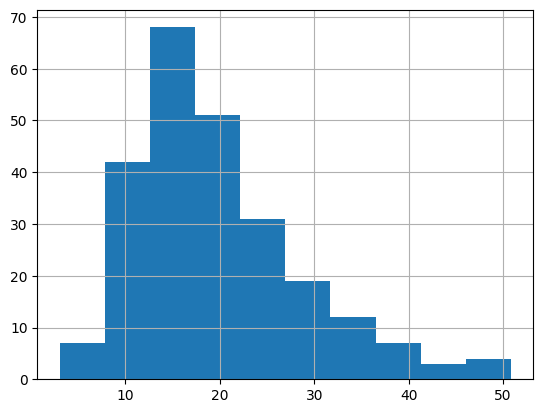

In [42]:
vis['total_bill'].hist()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

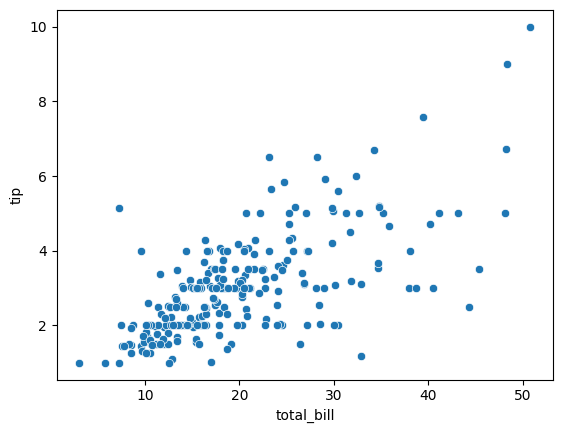

In [43]:
sns.scatterplot(data=vis, x='total_bill', y='tip')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

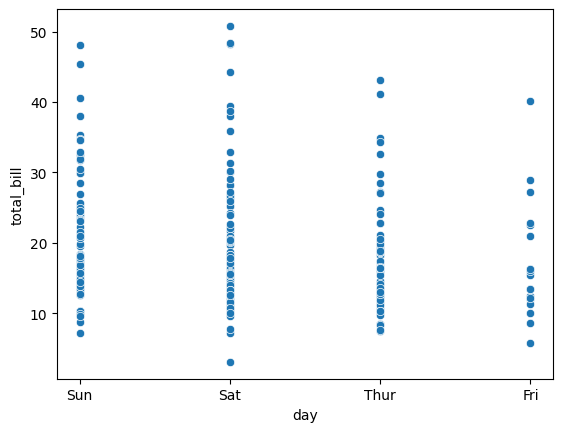

In [44]:
sns.scatterplot(data=vis, y='total_bill', x='day')

In [45]:
vis['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [46]:
vis2 = vis.copy()
def convert(day):
    if day == 'Thur':
        return 0
    if day == 'Fri':
        return 1
    if day == 'Sat':
        return 2
    if day == 'Sun':
        return 3 

In [47]:
# One hot enconding
vis2['day'] = vis2['day'].apply(convert)

In [48]:
vis2.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No    3  Dinner     2
1       10.34  1.66    Male     No    3  Dinner     3
2       21.01  3.50    Male     No    3  Dinner     3
3       23.68  3.31    Male     No    3  Dinner     2
4       24.59  3.61  Female     No    3  Dinner     4

<AxesSubplot:xlabel='day', ylabel='total_bill'>

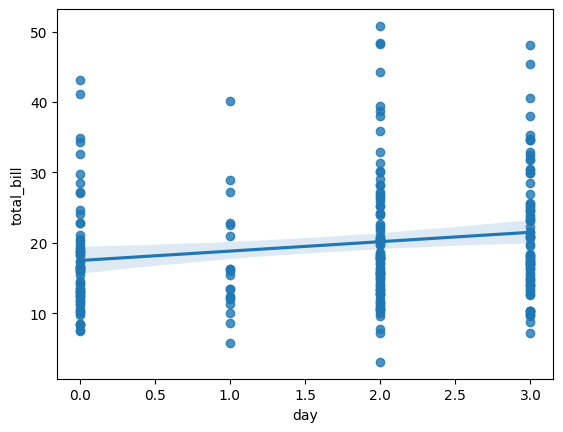

In [49]:
sns.regplot(data=vis2, x="day", y="total_bill")

La relación entre `day` y `total_bill` tiene una tendencia lineal casi constante como se puede observar en la anterior grafica.

In [50]:
vis['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

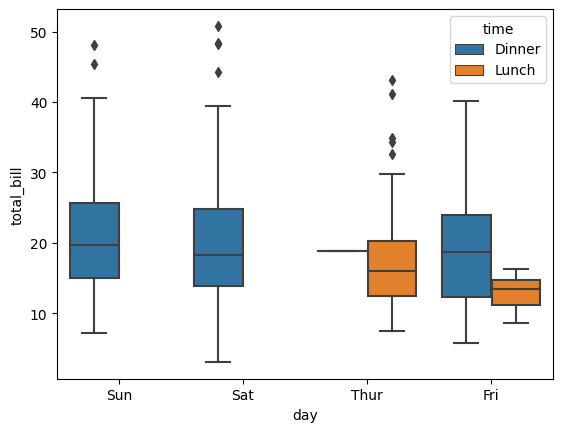

In [51]:
sns.boxplot(y='total_bill', x='day', data=vis, hue='time')


In [52]:
# No hay tiempo Lunch en el dia domingo
vis[(vis['day']=='Sun') & (vis['time']=='Lunch')]

Empty DataFrame
Columns: [total_bill, tip, sex, smoker, day, time, size]
Index: []

In [53]:
# No hay tiempo Lunch en el dia sabado
vis[(vis['day']=='Sat') & (vis['time']=='Lunch')]

Empty DataFrame
Columns: [total_bill, tip, sex, smoker, day, time, size]
Index: []

In [54]:
# Solo hay un tiempo Dinner en el dia jueves
vis[(vis['day']=='Thur') & (vis['time']=='Dinner')]

total_bill  tip     sex smoker   day    time  size
243       18.78  3.0  Female     No  Thur  Dinner     2